In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros iniciales
T = 1  # Tiempo de vencimiento (1 año)
t_vals = np.linspace(0, T, 100)  # Valores de t desde 0 hasta T
S0 = 100  # Precio inicial del activo
K = 50   # Precio de ejercicio
r = 0.1   # Tasa de interés (10%)
sigma = 0.4  # Volatilidad

# Función para calcular las griegas
def greeks(S, K, r, sigma, T, t):
    tau = T - t  # Tiempo restante hasta el vencimiento
    if tau <= 0:  # Opción expirada
        return 0, 0, 0, 0, 0  # Delta, Gamma, Theta, Vega, Rho

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    
    N_d1 = norm.cdf(d1)
    N_d1_prime = norm.pdf(d1) 
    N_d2 = norm.cdf(d2)

    # Delta
    delta = N_d1
    # Gamma
    gamma = N_d1_prime / (S * sigma * np.sqrt(tau))
    # Theta (por aproximación)
    theta = (-S * N_d1_prime * sigma / (2 * np.sqrt(tau)) - r * K * np.exp(-r * tau) * N_d2) / 365
    # Vega
    vega = S * N_d1_prime * np.sqrt(tau) / 100
    # Rho
    rho = K * tau * np.exp(-r * tau) * N_d2 / 100

    return delta, gamma, theta, vega, rho

# Calcular las griegas para cada valor de t
deltas, gammas, thetas, vegas, rhos = [], [], [], [], []
for t in t_vals:
    delta, gamma, theta, vega, rho = greeks(S0, K, r, sigma, T, t)
    deltas.append(delta)
    gammas.append(gamma)
    thetas.append(theta)
    vegas.append(vega)
    rhos.append(rho)

# Graficar las griegas
def plot_greeks(t_vals, deltas, gammas, thetas, vegas, rhos):
    fig, ax = plt.subplots(3, 2, figsize=(14, 10))

    ax[0, 0].plot(t_vals, deltas, label='Delta', color='blue')
    ax[0, 0].set_title('Delta vs Tiempo')
    ax[0, 0].set_xlabel('Tiempo t')
    ax[0, 0].set_ylabel('Delta')
    ax[0, 0].grid()
    
    ax[0, 1].plot(t_vals, gammas, label='Gamma', color='orange')
    ax[0, 1].set_title('Gamma vs Tiempo')
    ax[0, 1].set_xlabel('Tiempo t')
    ax[0, 1].set_ylabel('Gamma')
    ax[0, 1].grid()

    ax[1, 0].plot(t_vals, thetas, label='Theta', color='green')
    ax[1, 0].set_title('Theta vs Tiempo')
    ax[1, 0].set_xlabel('Tiempo t')
    ax[1, 0].set_ylabel('Theta')
    ax[1, 0].grid()

    ax[1, 1].plot(t_vals, vegas, label='Vega', color='red')
    ax[1, 1].set_title('Vega vs Tiempo')
    ax[1, 1].set_xlabel('Tiempo t')
    ax[1, 1].set_ylabel('Vega')
    ax[1, 1].grid()

    ax[2, 0].plot(t_vals, rhos, label='Rho', color='purple')
    ax[2, 0].set_title('Rho vs Tiempo')
    ax[2, 0].set_xlabel('Tiempo t')
    ax[2, 0].set_ylabel('Rho')
    ax[2, 0].grid()
    
    # Eliminar el último subgráfico vacío
    ax[2, 1].axis('off')

    plt.tight_layout()
    plt.show()

In [18]:
# Generar una función que simula la evolución de St
def simulate_stock_price(S0, r, sigma, T, t_vals):
    np.random.seed(42)  # Para reproducibilidad
    dt = t_vals[1] - t_vals[0]
    W = norm.rvs(0,1,100)
    W = np.cumsum(W)
    S = S0 * np.exp((r - sigma**2/2)*(dt) + sigma*np.sqrt(dt)*W)
    return np.array(S)

# Función para calcular f(t) para put y call
def black_scholes_ft(St_vals, K, r, sigma, T, t_vals, option_type='call'):
    ft_vals = []
    for i, t in enumerate(t_vals):
        tau = T - t  # Tiempo restante hasta vencimiento
        St = St_vals[i]
        d2 = (np.log(St / K) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
        d1 = d2 + sigma * np.sqrt(tau)
        
        if option_type == 'call':
            ft = St * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

        
        ft_vals.append(ft)
    return np.array(ft_vals)

# Simular los precios del activo subyacente
St_vals = simulate_stock_price(S0, r, sigma, T, t_vals)

# Cálculo del valor de las opciones put y call en función del tiempo
call_K1_vals = black_scholes_ft(St_vals, K, r, sigma, T, t_vals, 'call')


def graph(t_vals, St_vals, S0, K1, call1, title1):
    plt.plot(figsize=(12, 6))
    plt.plot(t_vals, call1, label='K=150 (Call)', color='blue')
    plt.axhline(K1, color='blue', label='Strike')
    plt.plot(t_vals, St_vals, label='Price', color='green', linestyle='-.')
    plt.scatter(0, S0, color='green', marker='*', s=100, label='S0')
    plt.title(f'{title1} (Valor vs Tiempo)')
    plt.xlabel('Tiempo t')
    plt.ylabel('Valor de la Opción')
    plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\luill\AppData\Local\Temp\ipykernel_30736\717226084.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  d2 = (np.log(St / K) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))


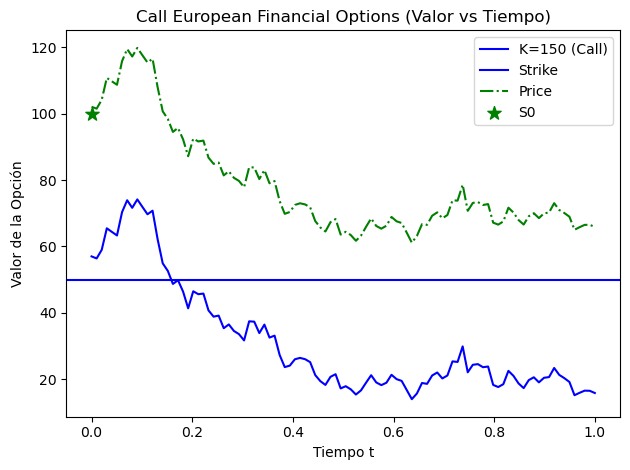

In [19]:
graph(t_vals, St_vals, S0, K, call_K1_vals, "Call European Financial Options")

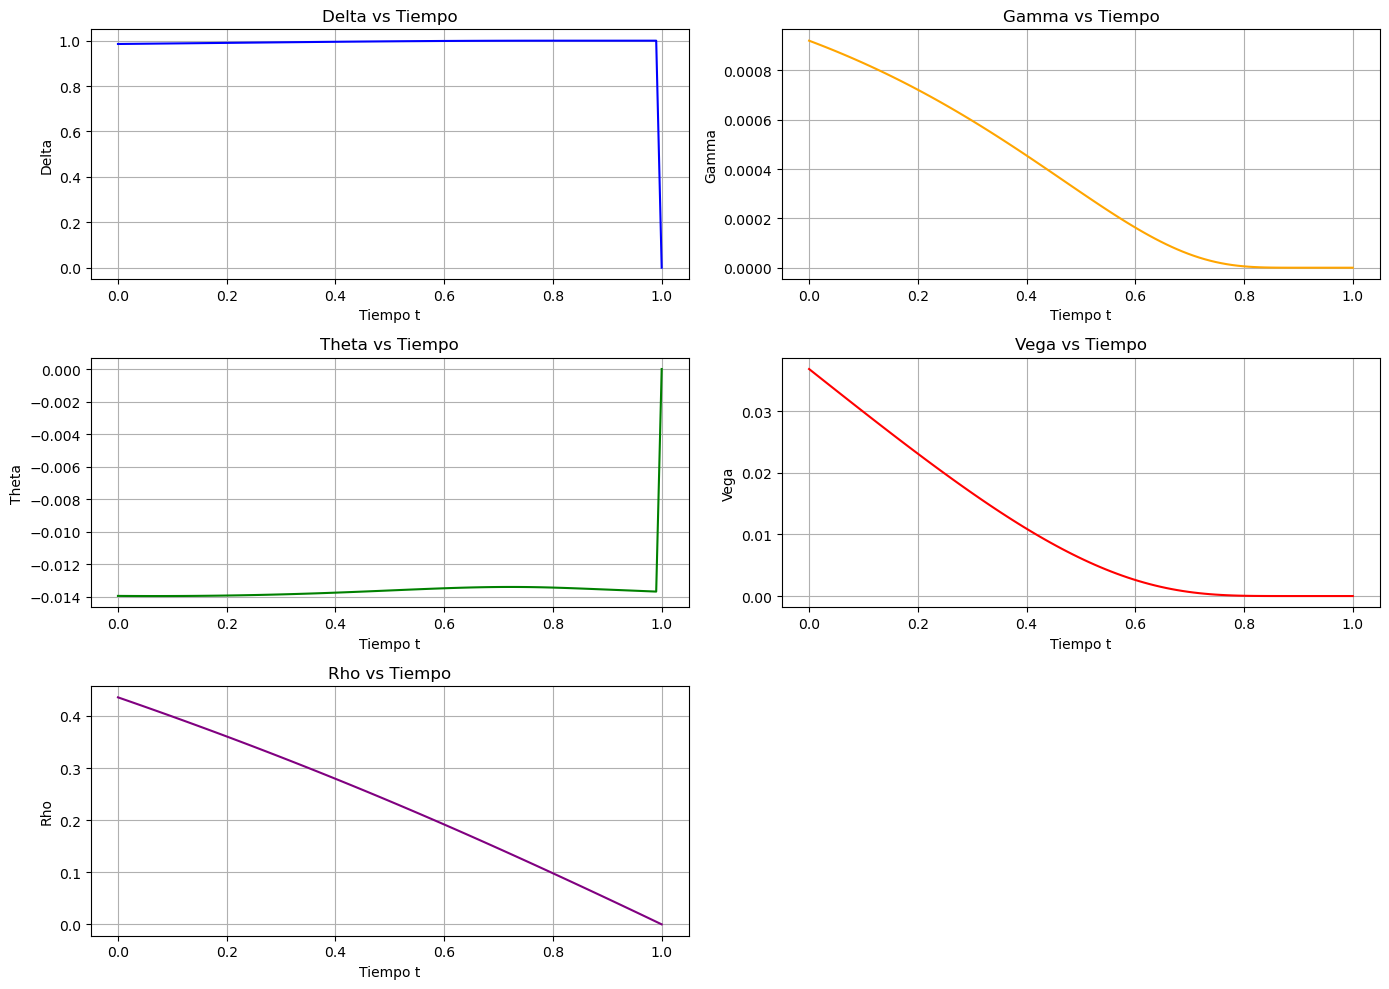

In [20]:
# Llamar a la función de graficar las griegas
plot_greeks(t_vals, deltas, gammas, thetas, vegas, rhos)